In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('seaborn')

## Load Datasets

In [3]:
df_salary = pd.read_csv('./datasets/salary_data.csv')

In [4]:
df_salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

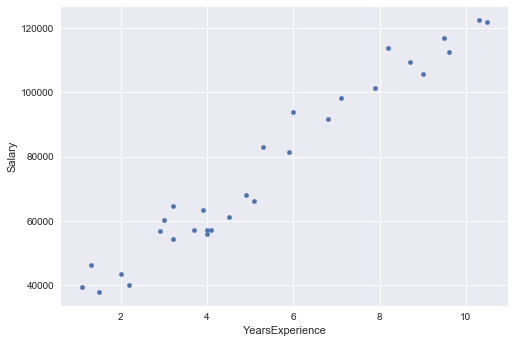

In [6]:
df_salary.plot.scatter(x='YearsExperience', y='Salary')

## Split Data

In [7]:
import sklearn
from sklearn.model_selection import train_test_split

In [8]:
train_data, test_data = train_test_split(df_salary, test_size=0.2, random_state=12)

In [9]:
print('Total rows:', train_data.shape[0])

Total rows: 24


In [10]:
print('Total rows test size:', test_data.shape[0])

Total rows test size: 6


## Data Preparation

In [11]:
train_label = train_data['Salary']

In [12]:
train_feature = train_data.drop(['Salary'], axis=1)

---

In [13]:
test_label = test_data['Salary']

In [14]:
test_feature = test_data.drop(['Salary'], axis=1)

## Training Model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr_model = LinearRegression()

In [17]:
lr_model.fit(X=train_feature, y=train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing Model

In [18]:
accuracy_score = lr_model.score(test_feature, test_label)

In [19]:
print('Accuracy Score:', {accuracy_score * 100 :0.2})

Accuracy Score: {94.29269163491423: 0.2}


---

In [20]:
salary_pred = lr_model.predict(test_feature)

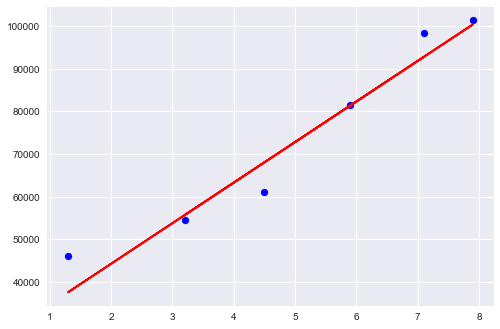

In [21]:
plt.scatter(test_data['YearsExperience'], test_data['Salary'], color='blue')
plt.plot(test_data['YearsExperience'], salary_pred, color='red', linewidth=2)

In [22]:
print('Coefficient:', lr_model.coef_[0])

Coefficient: 9509.996327102479


In [23]:
print('Intercept:', lr_model.intercept_)

Intercept: 25243.60315167621


In [24]:
test_feature['YearsExperience']

7     3.2
22    7.9
18    5.9
14    4.5
1     1.3
21    7.1
Name: YearsExperience, dtype: float64

In [25]:
salary_pred

array([ 55675.5913984 , 100372.57413579,  81352.58148158,  68038.58662364,
        37606.59837691,  92764.5770741 ])

In [26]:
abc = 9509.996327102479 * 5.9 + 25243.60315167621
abc

81352.58148158084

With 7.1 YearsExperience - RealSalary: 81363.0